In [1]:
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

In [3]:
X = pd.DataFrame(iris_data)
Y = pd.DataFrame(iris_target)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
Y.columns = ['Target']

In [4]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
scaler = preprocessing.StandardScaler()
xsa = scaler.fit_transform(X)
xs = pd.DataFrame(xsa,columns=X.columns)
xs.head()



,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [6]:
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
colormap=np.array(['red','lime','blue'])

Text(0, 0.5, 'petal_width')

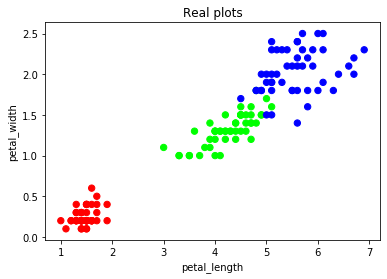

In [7]:
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.Target],s=40)
plt.title("Real plots")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

Text(0, 0.5, 'petal_width')

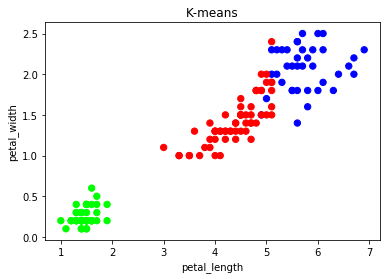

In [8]:
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title("K-means")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

Text(0, 0.5, 'petal_width')

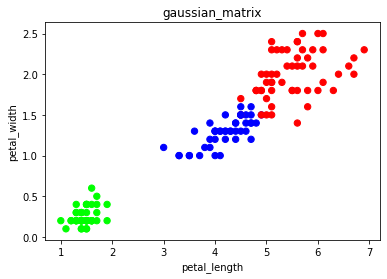

In [9]:
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[gmm_y],s=40)
plt.title("gaussian_matrix")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

In [10]:
print('observation : the gmm using EM algo based clustering matched the true labels more closely than Kmeans.')

observation : the gmm using EM algo based clustering matched the true labels more closely than Kmeans.
